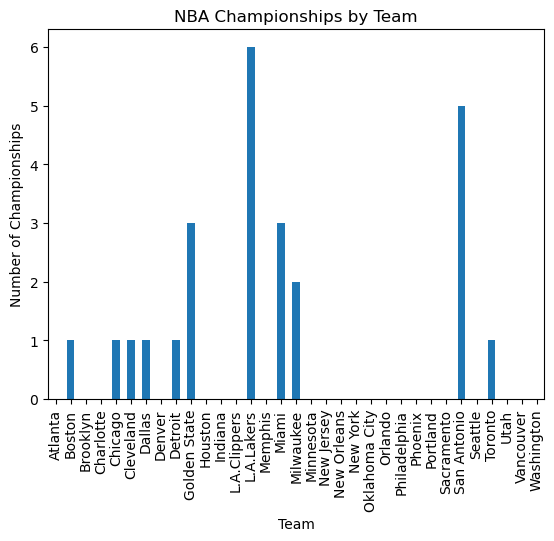

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
df = pd.read_csv('NBA.csv')

# Count the number of championships won by each team
champ_counts = df.groupby('Team')['Championship'].apply(lambda x: sum(x == 'Won'))

# Create a bar chart of the championship counts
champ_counts.plot(kind='bar')

# Add axis labels and a title
plt.xlabel('Team')
plt.ylabel('Number of Championships')
plt.title('NBA Championships by Team')

# Show the plot
plt.show()


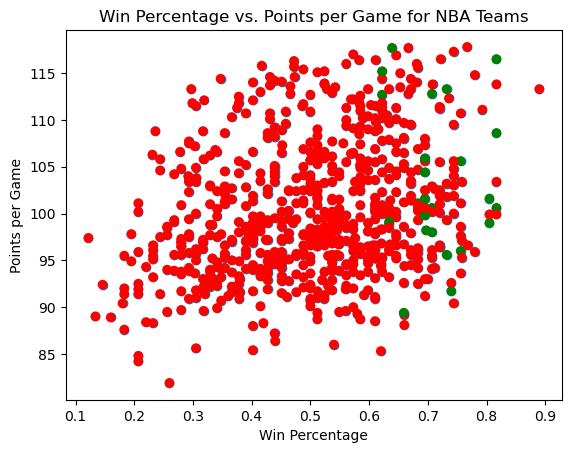

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
df = pd.read_csv('NBA.csv')

# Create a scatter plot of Win Percentage vs. Points per Game
plt.scatter(df['WP'], df['Pts'])

# Color-code the scatter plot by championship status
colors = {'Won': 'green', 'Lost': 'red'}
df['Color'] = df['Championship'].apply(lambda x: colors[x])
plt.scatter(df['WP'], df['Pts'], c=df['Color'])

# Add axis labels and a title
plt.xlabel('Win Percentage')
plt.ylabel('Points per Game')
plt.title('Win Percentage vs. Points per Game for NBA Teams')

# Show the plot
plt.show()


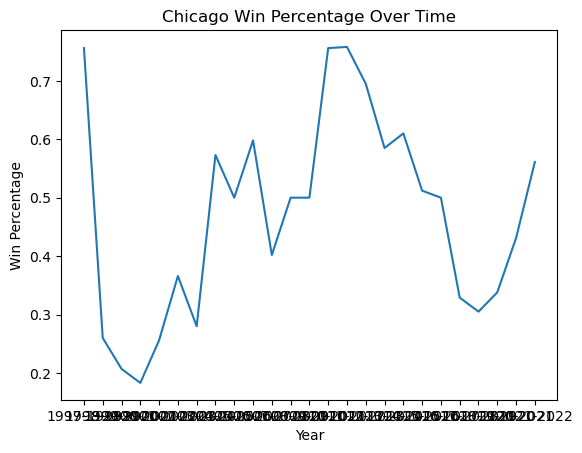

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
df = pd.read_csv('NBA.csv')

# Filter the dataframe to a single team
team = 'Chicago'
team_df = df[df['Team'] == team]

# Create a line chart of the team's win percentage over time
plt.plot(team_df['Year'], team_df['WP'])

# Add axis labels and a title
plt.xlabel('Year')
plt.ylabel('Win Percentage')
plt.title(f'{team} Win Percentage Over Time')

# Show the plot
plt.show()


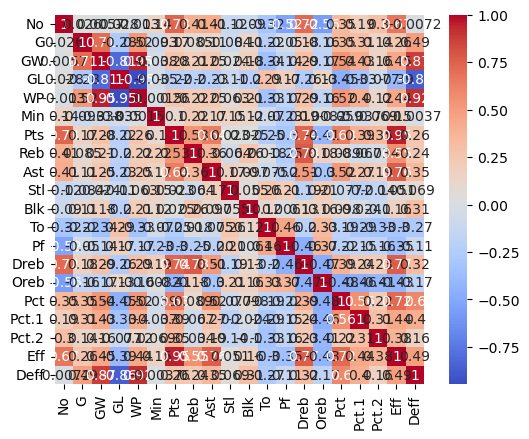

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('NBA.csv')

# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap plot of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)

# Show the plot
plt.show()


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load the data
data = pd.read_csv("NBA2.csv")

# Encode the target variable
le = LabelEncoder()
data["Championship"] = le.fit_transform(data["Championship"])

# Encode the team names
le = LabelEncoder()
data['Team_encoded'] = le.fit_transform(data['Team'])

# Split the data into train and test sets
X = data.drop(["Championship", "Team"], axis=1)
y = data["Championship"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate different models
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")


Model: DecisionTreeClassifier
Accuracy: 0.9448
Confusion Matrix:
[[135   6]
 [  2   2]]

Model: RandomForestClassifier
Accuracy: 0.9517
Confusion Matrix:
[[138   3]
 [  4   0]]

Model: KNeighborsClassifier
Accuracy: 0.9724
Confusion Matrix:
[[141   0]
 [  4   0]]

Model: GaussianNB
Accuracy: 0.8276
Confusion Matrix:
[[118  23]
 [  2   2]]

Model: SVC
Accuracy: 0.9724
Confusion Matrix:
[[141   0]
 [  4   0]]



C:\Users\ishan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
from sklearn.ensemble import RandomForestClassifier
# Load historical NBA data
historical_data = pd.read_csv('NBA2.csv')

# Define target variable and predictor variables
target = 'Championship'
predictors = ['GW', 'GL', 'WP', 'Min', 'Pts', 'Reb', 'Ast', 'Stl', 'Blk', 'To', 'Pf', 'Dreb', 'Oreb', 'FGM', 'FGA', 'Pct1', '3gm', '3ga', 'FTM', 'FTA', 'Pct3',
             'Pct3', 'Eff', 'Deff']

# Train random forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(historical_data[predictors], historical_data[target])

# Make predictions on current season's data
current_data = pd.read_csv('NBA4.csv')
current_predictions = model.predict(current_data[predictors])

# Create a DataFrame to store the predictions for all teams
all_predictions = pd.DataFrame({'Team': current_data['Team'], 'Predicted Champion': current_predictions})

# Print the predictions for all teams
print(all_predictions)


            Team Predicted Champion
0        Chicago                Won
1           Utah               Lost
2        Indiana               Lost
3     L.A.Lakers               Lost
4        Seattle               Lost
5       New York               Lost
6    San Antonio               Lost
7      Charlotte               Lost
8          Miami               Lost
9      Minnesota               Lost
10       Houston               Lost
11       Phoenix               Lost
12       Atlanta               Lost
13     Cleveland               Lost
14      Portland               Lost
15    New Jersey               Lost
16    Washington               Lost
17       Detroit               Lost
18     Milwaukee               Lost
19       Orlando               Lost
20        Boston               Lost
21  Philadelphia               Lost
22    Sacramento               Lost
23        Dallas               Lost
24     Vancouver               Lost
25  L.A.Clippers               Lost
26  Golden State            